In [1]:
import numpy as np
import pandas as pd
import warnings

import matplotlib.pyplot as plt

In [2]:
warnings.simplefilter("ignore")

features = pd.read_csv('SCADA/features_T.csv')
labels = pd.read_csv('SCADA/labels_T.csv')
conditions = pd.read_csv('SCADA/condition_T.csv')

In [3]:
print(features.columns)
print(conditions.columns)
print(labels.columns)

Index(['Unnamed: 0', 'Rotordrehzahl', 'Leistung', 'Generator_Umdr', 'T_Aussen',
       'T_Gen1', 'T_Gen2', 'T_Getriebe', 'T_Getriebelager', 'T_Wellenlager',
       'Drehmoment', 'Triebstrangbeschl', 'T_Generatorkuehlluft',
       'T_Getriebelager_B'],
      dtype='object')
Index(['0.000000000000000000e+00'], dtype='object')
Index(['Unnamed: 0', 'Fehler_051', 'Fehler_052', 'Fehler_071', 'Fehler_072',
       'Fehler_077', 'Fehler_089', 'Fehler_098', 'Fehler_425'],
      dtype='object')


In [4]:
labels[labels==1].count()

Unnamed: 0      1
Fehler_051     13
Fehler_052    482
Fehler_071     32
Fehler_072      4
Fehler_077    208
Fehler_089     33
Fehler_098      5
Fehler_425      1
dtype: int64

In [5]:
features['Fehler_098']=labels['Fehler_098']
features.head()

,Unnamed: 0,Rotordrehzahl,Leistung,Generator_Umdr,T_Aussen,T_Gen1,T_Gen2,T_Getriebe,T_Getriebelager,T_Wellenlager,Drehmoment,Triebstrangbeschl,T_Generatorkuehlluft,T_Getriebelager_B,Fehler_098
0,0,0.388821,-0.262396,0.372827,-0.182108,0.349576,0.333813,0.129720,0.253259,0.253259,-0.193027,-0.458352,0.314737,0.738088,0
1,1,0.390541,0.055554,0.372999,-0.243631,0.597289,0.568279,0.159978,0.253259,0.253259,0.294183,-0.358655,0.482893,0.738088,0
2,2,0.393981,0.101523,0.377180,-0.454949,0.575339,0.559795,0.241788,0.253259,0.253259,0.359708,-0.445023,0.293718,0.738088,0
3,3,0.414623,0.155153,0.397264,-0.583345,0.477352,0.467243,0.241788,0.253259,0.253259,0.425233,-0.330399,0.149900,0.738088,0
4,4,0.462787,0.247091,0.446921,-0.583345,0.380932,0.375462,0.309028,0.253259,0.253259,0.536731,-0.418366,0.025996,0.738088,0


In [6]:
#cond_feature=features+conditions

#cond_feature.head()

cond_f = features
cond_f['condition']=conditions

In [7]:
err_matrix = cond_f.loc[cond_f['Fehler_098'] == 1]

err_matrix.reset_index(drop=True, inplace = True)
len(err_matrix)

5

In [8]:
good_matrix = cond_f.loc[cond_f['Fehler_098'] == 0]

good_matrix.reset_index(drop=True, inplace = True)


In [9]:
# save the data
#err_matrix.to_csv('SCADA/error_f.csv', index=False)

#good_matrix.to_csv('SCADA/good_f.csv', index=False)

# Hist Plots

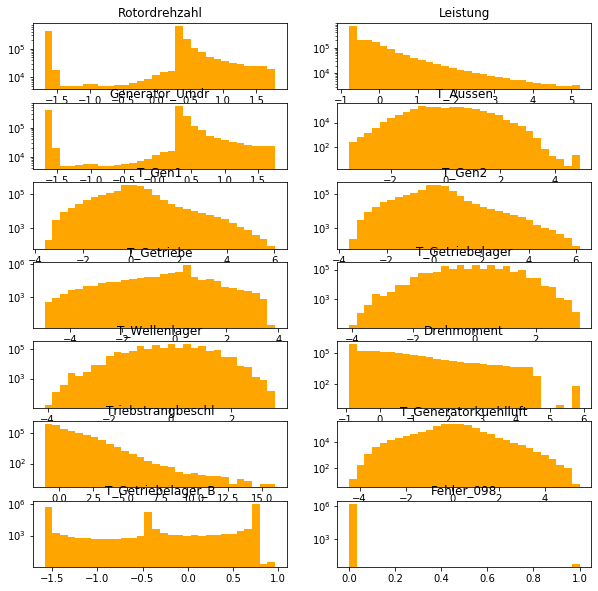

In [10]:
f,a = plt.subplots(7,2, figsize=(10,10))
a = a.ravel()
for idx,ax in enumerate(a):
    if idx >= 14:
        break
    #print(idx, ax)
    ax.hist(features[features.columns.values[idx+1]], bins=30, color='orange')

    ax.set_yscale('log')
    ax.set_title(features.columns.values[idx+1])
    

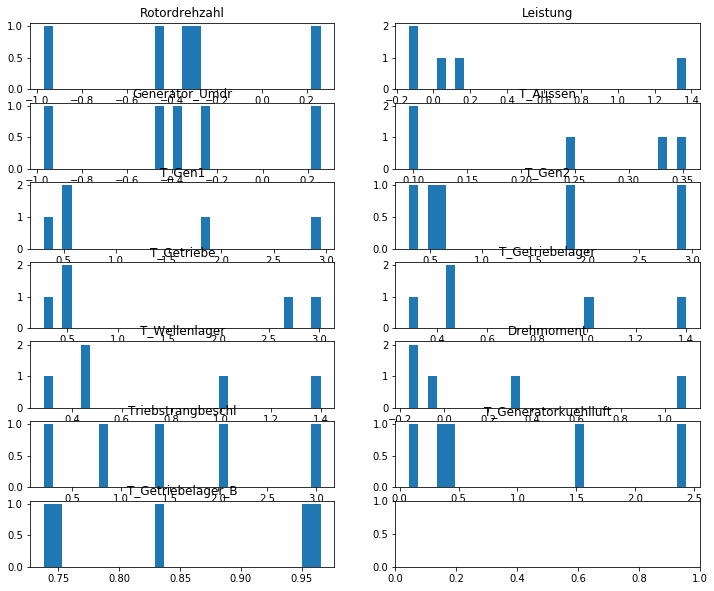

In [11]:
f,a = plt.subplots(7,2, figsize=(12,10))
a = a.ravel()
for idx,ax in enumerate(a):
    if idx >= 13:
        break
    #print(idx, ax)
    ax.hist(err_matrix[err_matrix.columns.values[idx+1]], bins=30)
    
    ax.set_title(err_matrix.columns.values[idx+1])
    #ax.set_xlabel(xaxes[idx])
    #ax.set_ylabel(yaxes[idx])
    #plt.tight_layout()

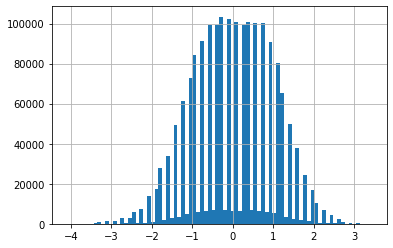

In [12]:
good_matrix['T_Getriebelager'].hist(bins=80)

# Work on Feature set

In [13]:
#err_matrix['Fehler_098'] = labels['Fehler_098']
#features['Fehler_098'] = labels['Fehler_098']
err_matrix.head()

,Unnamed: 0,Rotordrehzahl,Leistung,Generator_Umdr,T_Aussen,T_Gen1,T_Gen2,T_Getriebe,T_Getriebelager,T_Wellenlager,Drehmoment,Triebstrangbeschl,T_Generatorkuehlluft,T_Getriebelager_B,Fehler_098,condition
0,94497,-0.345677,-0.112998,-0.361431,0.328800,0.312732,0.302191,0.451354,0.286725,0.286725,-0.055108,0.214198,0.081310,0.954170,1,0.0
1,230647,0.261531,0.128338,0.256713,0.247215,0.572204,0.588332,0.488336,0.455727,0.455727,0.332758,0.798780,0.434217,0.965542,1,0.0
2,230815,-0.476408,-0.132151,-0.476247,0.100095,0.563581,0.559024,0.267563,0.457400,0.457400,-0.130673,1.382563,0.356776,0.749461,1,0.0
3,239361,-0.275152,1.369495,-0.273113,0.096082,2.948210,2.944561,2.660203,1.399464,1.399464,1.095279,3.045410,2.427751,0.829070,1,0.0
4,572112,-0.968366,0.021078,-0.968062,0.352874,1.860155,1.841646,3.017698,1.022973,1.022973,-0.157094,2.053780,1.509531,0.738088,1,0.0


In [14]:
err_matrix['Tot_98']=0
for idx,ax in enumerate(features[features.columns.values]):
    if idx == 14:
        break
    err_matrix['Tot_98'] = err_matrix['Tot_98']+ err_matrix[err_matrix.columns.values[idx+1]]
    
err_matrix['Tot_98'] = err_matrix['Tot_98']+labels['Fehler_071']

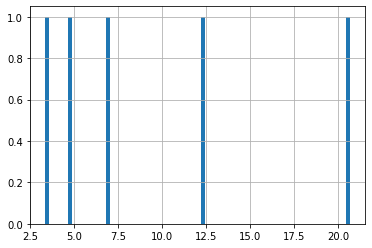

In [15]:
err_matrix['Tot_98'].hist(bins=80)

In [16]:
good_matrix['Tot_98']=0
for idx,ax in enumerate(features[features.columns.values]):
    if idx == 14:
        break
    good_matrix['Tot_98'] = good_matrix['Tot_98']+ good_matrix[good_matrix.columns.values[idx+1]]
    

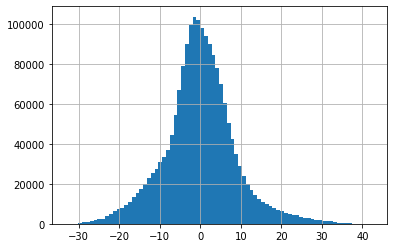

In [17]:
good_matrix['Tot_98'].hist(bins=80)

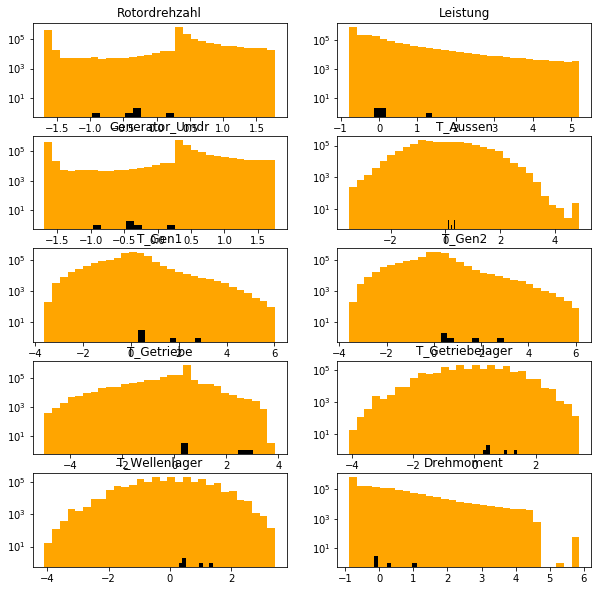

In [18]:
f,aa = plt.subplots(5,2, figsize=(10,10))
aa = aa.ravel()
for idx,ax in enumerate(aa):
    if idx >= 10:
        break
    #print(idx, ax)
    a = features.loc[features['Fehler_098'] == 1,[features.columns.values[idx+1],features.columns.values[idx+2]]] #anomaly

    #ax.plot(features['T_Gen1'], features['T_Getriebelager'], color='blue')
    
    ax.hist(features[features.columns.values[idx+1]], bins=30, color='orange')
    ax.hist(a[features.columns.values[idx+1]], color='black')
    ax.set_title(features.columns.values[idx+1])
    ax.set_yscale('log')

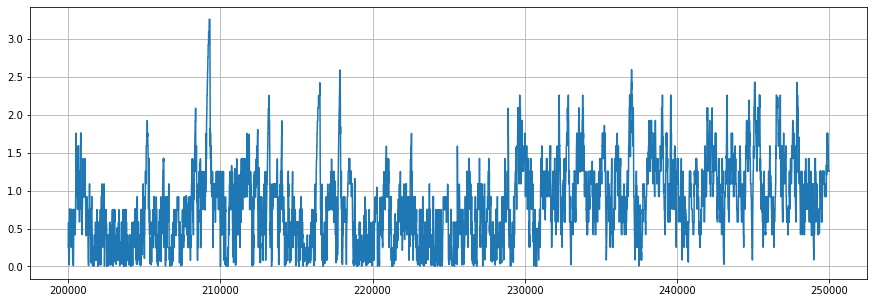

In [19]:
plt.subplots(figsize=(15,5))
plt.plot(np.abs(features['T_Wellenlager'][200000:250000]))
plt.grid()

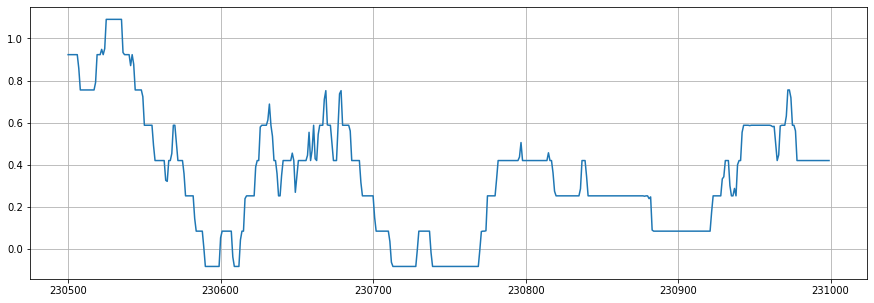

In [20]:
plt.subplots(figsize=(15,5))
plt.plot(features['T_Wellenlager'][230500:231000])
plt.grid()

In [21]:
#features = features.drop(features.index[600000:])
#features = features.drop(features.index[250000:560000])

len(features)

1860383

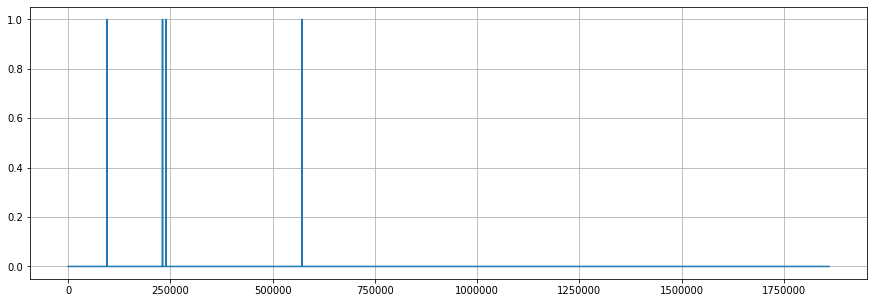

In [22]:
plt.subplots(figsize=(15,5))
#plt.plot(cond_f['condition'][993750:994500])

plt.plot(features['Fehler_098'])

plt.grid()

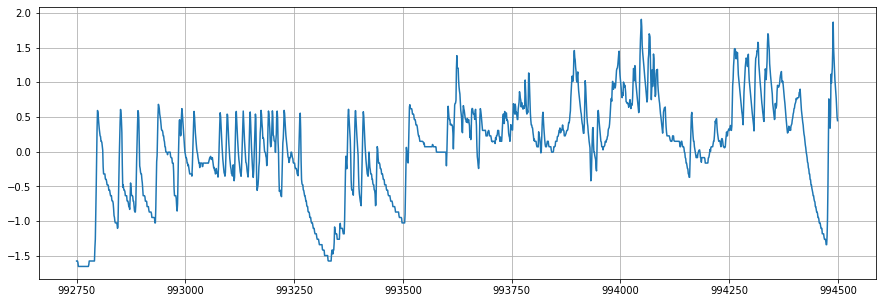

In [23]:
plt.subplots(figsize=(15,5))
plt.plot(features['T_Gen1'][992750:994500])
plt.grid()

In [24]:
temp = pd.DataFrame()
temp['T_Getriebelager_1'] =features['T_Getriebelager'][0:50000]

temp = pd.concat([temp, good_matrix['T_Getriebelager'][0:50000]], axis=1)

In [25]:
temp

,T_Getriebelager_1,T_Getriebelager
0,0.253259,0.253259
1,0.253259,0.253259
2,0.253259,0.253259
3,0.253259,0.253259
4,0.253259,0.253259
...,...,...
49995,-0.416058,-0.416058
49996,-0.516456,-0.516456
49997,-0.583387,-0.583387
49998,-0.548248,-0.548248


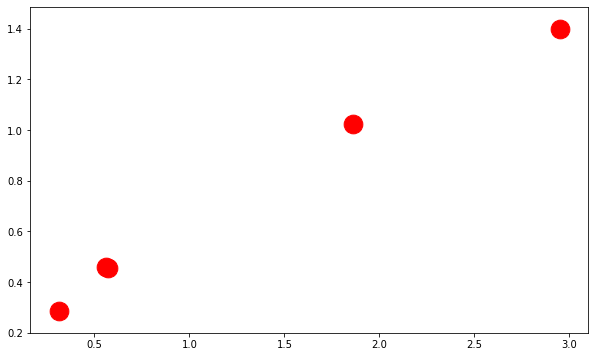

In [26]:
fig, ax = plt.subplots(figsize=(10,6))
a = features.loc[features['Fehler_098'] == 1,['T_Gen1','T_Getriebelager']] #anomaly

#ax.plot(features['T_Gen1'], features['T_Getriebelager'], color='blue')
ax.scatter(a['T_Gen1'],a['T_Getriebelager'], color='red', s=350)
plt.show();

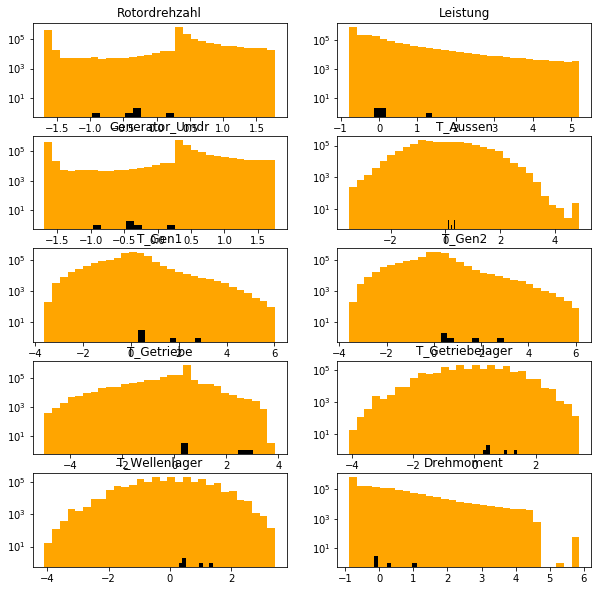

In [32]:
f,aa = plt.subplots(5,2, figsize=(10,10))
aa = aa.ravel()
for idx,ax in enumerate(aa):
    if idx >= 10:
        break
    #print(idx, ax)
    a = features.loc[features['Fehler_098'] == 1,[features.columns.values[idx+1],features.columns.values[idx+2]]] #anomaly

    #ax.plot(features['T_Gen1'], features['T_Getriebelager'], color='blue')
    
    ax.hist(features[features.columns.values[idx+1]], bins=30, color='orange')
    ax.hist(a[features.columns.values[idx+1]], color='black')
    ax.set_title(features.columns.values[idx+1])
    ax.set_yscale('log')

In [28]:
from scipy import signal
from scipy.fftpack import fft, ifft

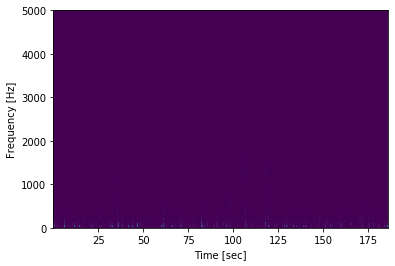

In [31]:
f, t, Sxx = signal.spectrogram(features[features.columns.values[2]], 10e3)
plt.pcolormesh(t, f, Sxx, shading='orange')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()